In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [9]:
df = pd.read_csv("/content/housing.csv")

This kernel is divided into 7 parts. The most important part of "house price prediction" is knowing the data we are working with. Almost 75% of the prediction effort goes into getting familiar with data, data cleaning and making the data ready for maching learning algorithms. So, broadly you can divide the seven substep into 2 major categories.


Working with data

Get to know your data

Data Cleaning(if required)

Scaling the data into machine learning readbable format

Dividing the data into train/test

Working with Machine Learning Algorithms


Applying machine learning algorithm

Testing the effectiveness of the machine learning Algorithm

Trying different Algorithms

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [12]:
# In the given datasets we have 9 continuous variables and one categorical variable. ML algorithms do not work well with categorical data. 
# So, we will convert the categorical data. 
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Working with categorical data

In [13]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


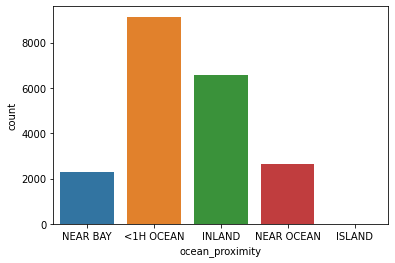

In [14]:
sns.countplot(df.ocean_proximity)

In [15]:
new_val = pd.get_dummies(df.ocean_proximity)

In [16]:
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [17]:
df[new_val.columns] = new_val

In [18]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [20]:
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [21]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [22]:
# Now, let's understand the correlation between variable by plotting correlation plot
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,0.321121,-0.055575,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.168876,-0.237496,-0.009228,0.056197,0.027344,0.688075
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.013872,-0.314813,-0.342620,0.256617
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006463,-0.020732,-0.039402,-0.237496,-0.607669,1.000000,-0.010614,-0.240887,-0.262163,-0.484859


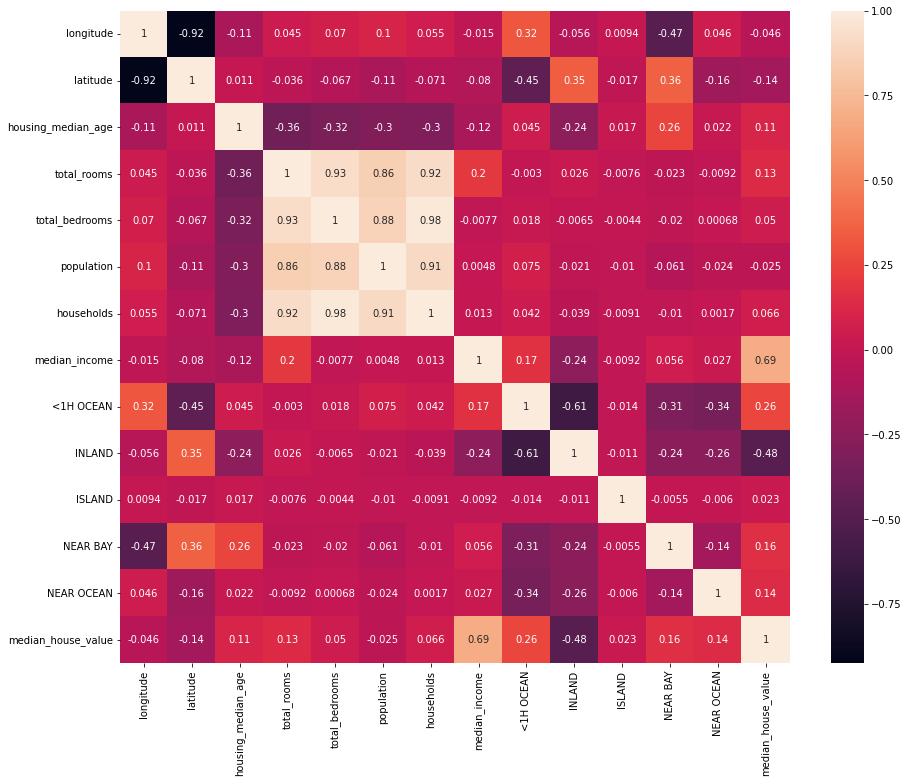

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [24]:
df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91b3b48810>,
      dtype=object)

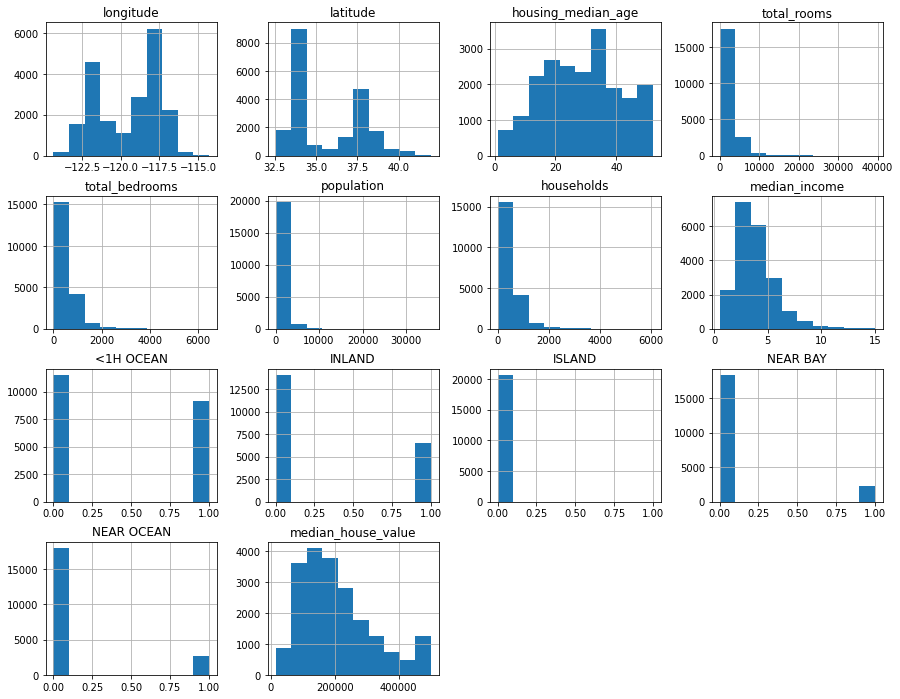

In [25]:
df.hist(figsize=(15,12))

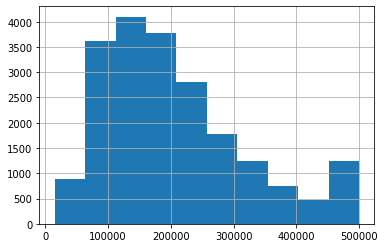

In [26]:
df.median_house_value.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


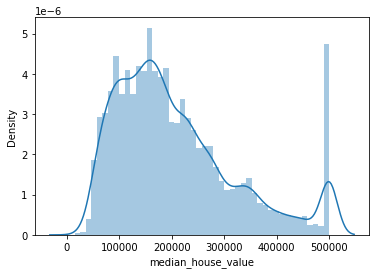

In [27]:
sns.distplot(df.median_house_value)

# We can see that the median house value is mostly falls between 10,0000 to 30,0000 with few exceptions. 

Data Cleaning

In [28]:
# We will need to replace all the null values.
df.isna().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
median_house_value      0
dtype: int64

In [29]:
# So, we have 207 null values. We can drop the rows with null values or we can replace the null values.
# 207 is too big a number to drop rows
df = df.fillna(df.mean())

In [30]:
df.isna().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

Data Scaling

In [31]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler() 

In [32]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [33]:
feature = df.drop(['median_house_value'], axis=1)
label = df.median_house_value

In [34]:
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(df.median_house_value.values.reshape(-1,1)).flatten() 

In [35]:
featureT

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [36]:
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

Split the data into train and test

In [38]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)  

ML Model - Linear Regression

In [39]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.4570357093275331

Cross Validation Score

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cross_val_score(linear_reg, feature_train,label_train, cv=10) 

array([0.68347868, 0.62143147, 0.63597643, 0.64036722, 0.63004772,
       0.64009756, 0.63399809, 0.65868744, 0.6610548 , 0.66014824])

In [42]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 

In [43]:
reg_score

0.4409910723163827

In [44]:
linear_reg.coef_

array([-0.45964271, -0.46958263,  0.11238544, -0.07755593,  0.26022529,
       -0.4407318 ,  0.29275384,  0.63242516,  0.05426747, -0.1105879 ,
        0.02476957,  0.02563709,  0.04801414])

In [45]:
pd.DataFrame(linear_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
median_income,0.632425
households,0.292754
total_bedrooms,0.260225
housing_median_age,0.112385
<1H OCEAN,0.054267
NEAR OCEAN,0.048014
NEAR BAY,0.025637
ISLAND,0.024770
total_rooms,-0.077556
INLAND,-0.110588


In [46]:
df.corr().median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

RANSAC Regression

In [47]:
ransac_reg = linear_model.RANSACRegressor()

In [48]:
ransac_reg.fit(feature_train,label_train)
r2_score(ransac_reg.predict(feature_train),label_train)

-0.00024230676078218494

In [49]:
ransac_score = r2_score(ransac_reg.predict(feature_test),label_test)

In [50]:
ransac_score

-0.00024230676056458123

# Ransac regrssor is performing way poorly than Linear Regresson

Ridge Regressor

In [51]:
ridge_reg = linear_model.Ridge(random_state=19) 
ridge_reg.fit(feature_train,label_train) 

Ridge(random_state=19)

In [52]:
r2_score(ridge_reg.predict(feature_train),label_train)

0.456912393620578

In [53]:
ridge_score = r2_score(ridge_reg.predict(feature_test),label_test) 

In [54]:
ridge_score

0.4408622970359932

In [55]:
ridge_reg.coef_

array([-0.45868985, -0.46857275,  0.11239848, -0.07739211,  0.26004841,
       -0.44045521,  0.29252023,  0.63237809,  0.05434228, -0.11080434,
        0.02477619,  0.02572536,  0.04812089])

In [56]:
pd.DataFrame(ridge_reg.coef_, index=feature.columns, columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient') 

,Coefficient
median_income,0.632378
households,0.292520
total_bedrooms,0.260048
housing_median_age,0.112398
<1H OCEAN,0.054342
NEAR OCEAN,0.048121
NEAR BAY,0.025725
ISLAND,0.024776
total_rooms,-0.077392
INLAND,-0.110804


Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train,label_train)

DecisionTreeRegressor()

In [58]:
r2_score(tree_reg.predict(feature_train),label_train)

1.0

In [59]:
cross_val_score(tree_reg, feature_train, label_train, cv=10)

array([0.64855193, 0.65645813, 0.59648643, 0.64024023, 0.64873081,
       0.63482022, 0.6773919 , 0.63478113, 0.6307967 , 0.64462713])

In [60]:
tree_score = r2_score(tree_reg.predict(feature_test),label_test) 
tree_score

0.6292368336038613

Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [62]:
forest_reg.fit(feature_train,label_train)

RandomForestRegressor()

In [63]:
r2_score(forest_reg.predict(feature_train),label_train)

0.9714104556521717

In [64]:
cross_val_score(forest_reg, feature_train, label_train, cv=10)

array([0.8306049 , 0.81243552, 0.79442959, 0.80550904, 0.82862777,
       0.8064675 , 0.8222592 , 0.81699123, 0.80088161, 0.83415562])

In [65]:
# let's see how well the random forest regressor fits well with the test data
forest_score = r2_score(forest_reg.predict(feature_test),label_test) 
forest_score

0.7731593892326107

In [66]:
# 77% is not a bad score. We can also use GridSearchCV to find the best paramters for random forest regressor
data = [reg_score, ransac_score, ridge_score, tree_score, forest_score]
index = ['Linear Regression', 'Ransac Regression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.773159
Decision Tree Regressor,0.629237
Linear Regression,0.440991
Ridge Regression,0.440862
Ransac Regression,-0.000242


# So, the random forest regressor is winner here out of all the ML Algorithm